In [1]:
####################################  Customer Segmentation with Unsupervised Learning   #################################### 

# Business Problem : Segmenting customers into clusters and observing their behavior with Unsupervised Learning methods
                    #(Kmeans, Hierarchical Clustering)  to develop marketing strategies according to segments are aimed
 

# Dataset : The dataset includes information about previous shopping behavior of customers made purchases on OmniChannel         
           #(both online and offline) in 2020 - 2021.

# master_id: Customer id
# order_channel : The channel of the shopping platform is used (Android, ios, Desktop, Mobile, Offline)
# last_order_channel : The channel which the most recent purchase from
# first_order_date : First purchase date by the customer
# last_order_date : Last purchase date by the customer
# last_order_date_online : The date of the last online purchase by the customer 
# last_order_date_offline : The date of the last offline purchase by the customer
# order_num_total_ever_online : The total number of online purchases by the customer 
# order_num_total_ever_offline : The total number of offline purchases by the customer 
# customer_value_total_ever_offline : Total monetary paid by the customer for offline purchases
# customer_value_total_ever_online : Total monetary paid by the customer for online purchases
# interested_in_categories_12 : List of categories the customer has shopped in the last 12 months
# store_type : Refers to 3 different companies. A,B : Customer shopping from both companies A and B

import pandas as pd
from scipy import stats
import datetime as dt
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import linkage
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import AgglomerativeClustering
import seaborn as sns
import numpy as np

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.float_format', lambda x: '%.2f' % x)
pd.set_option('display.width', 1000)


df_ = pd.read_csv(r"C:\Users\burcu\OneDrive\Masaüstü\DS Miiul\6.Machine Learning\DK\13. Case  Flo Unsupervised Learning\Tanıtım\FLO_Unsupervised_Learning\flo_data_20k.csv")
df = df_.copy()

In [2]:
df.head()

,master_id,order_channel,last_order_channel,first_order_date,last_order_date,last_order_date_online,last_order_date_offline,order_num_total_ever_online,order_num_total_ever_offline,customer_value_total_ever_offline,customer_value_total_ever_online,interested_in_categories_12
0,cc294636-19f0-11eb-8d74-000d3a38a36f,Android App,Offline,2020-10-30,2021-02-26,2021-02-21,2021-02-26,4.00,1.00,139.99,799.38,[KADIN]
1,f431bd5a-ab7b-11e9-a2fc-000d3a38a36f,Android App,Mobile,2017-02-08,2021-02-16,2021-02-16,2020-01-10,19.00,2.00,159.97,1853.58,"[ERKEK, COCUK, KADIN, AKTIFSPOR]"
2,69b69676-1a40-11ea-941b-000d3a38a36f,Android App,Android App,2019-11-27,2020-11-27,2020-11-27,2019-12-01,3.00,2.00,189.97,395.35,"[ERKEK, KADIN]"
3,1854e56c-491f-11eb-806e-000d3a38a36f,Android App,Android App,2021-01-06,2021-01-17,2021-01-17,2021-01-06,1.00,1.00,39.99,81.98,"[AKTIFCOCUK, COCUK]"
4,d6ea1074-f1f5-11e9-9346-000d3a38a36f,Desktop,Desktop,2019-08-03,2021-03-07,2021-03-07,2019-08-03,1.00,1.00,49.99,159.99,[AKTIFSPOR]


In [3]:
# 1. Data Preparing

# Converting variables with "date" to datetime data type

date_columns = df.columns[df.columns.str.contains("date")]
df[date_columns] = df[date_columns].apply(pd.to_datetime)

In [4]:

df["last_order_date"].max() # 2021-05-30
analysis_date = dt.datetime(2021,6,1)

In [5]:
# Number of days since last shopping of the customer

df["recency"] = (analysis_date - df["last_order_date"]).astype('timedelta64[D]') 
df["tenure"] = (df["last_order_date"]-df["first_order_date"]).astype('timedelta64[D]')

In [6]:
model_df = df[["order_num_total_ever_online","order_num_total_ever_offline","customer_value_total_ever_offline","customer_value_total_ever_online","recency","tenure"]]
model_df.head()

,order_num_total_ever_online,order_num_total_ever_offline,customer_value_total_ever_offline,customer_value_total_ever_online,recency,tenure
0,4.00,1.00,139.99,799.38,95.00,119.00
1,19.00,2.00,159.97,1853.58,105.00,1469.00
2,3.00,2.00,189.97,395.35,186.00,366.00
3,1.00,1.00,39.99,81.98,135.00,11.00
4,1.00,1.00,49.99,159.99,86.00,582.00


In [8]:
# 2. Customer Segmentation with K-Means

# Standardization of variables

#SKEWNESS
def check_skew(df_skew, column):
    skew = stats.skew(df_skew[column])
    skewtest = stats.skewtest(df_skew[column])
    plt.title('Distribution of ' + column)
    sns.distplot(df_skew[column],color = "g")
    print("{}'s: Skew: {}, : {}".format(column, skew, skewtest))
    return

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


order_num_total_ever_online's: Skew: 10.487693811914617, : SkewtestResult(statistic=152.9996121784795, pvalue=0.0)


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


order_num_total_ever_offline's: Skew: 20.328068075845888, : SkewtestResult(statistic=184.13121810134328, pvalue=0.0)


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


customer_value_total_ever_offline's: Skew: 16.29952194789334, : SkewtestResult(statistic=173.73456097827923, pvalue=0.0)


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


customer_value_total_ever_online's: Skew: 20.08427979804232, : SkewtestResult(statistic=183.56317267711924, pvalue=0.0)
recency's: Skew: 0.6172488156761073, : SkewtestResult(statistic=32.86977170491703, pvalue=5.944419293752164e-237)


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


tenure's: Skew: 1.756242119042335, : SkewtestResult(statistic=71.08790370222574, pvalue=0.0)


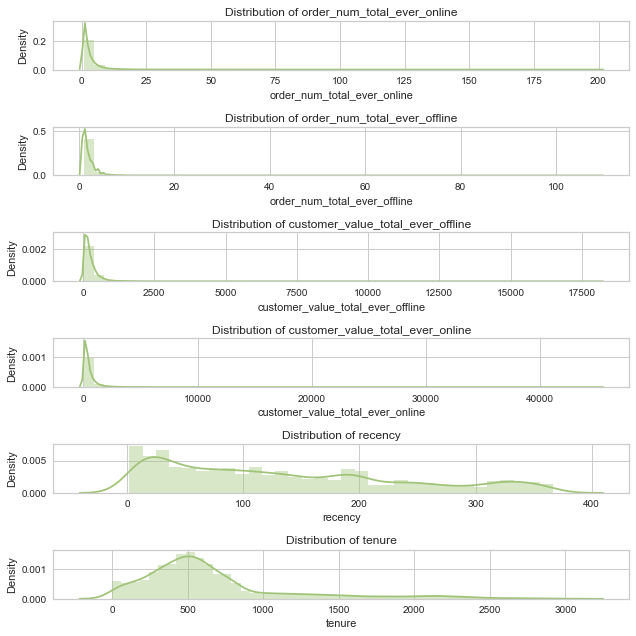

In [9]:
plt.figure(figsize=(9, 9))
plt.subplot(6, 1, 1)
check_skew(model_df,'order_num_total_ever_online')
plt.subplot(6, 1, 2)
check_skew(model_df,'order_num_total_ever_offline')
plt.subplot(6, 1, 3)
check_skew(model_df,'customer_value_total_ever_offline')
plt.subplot(6, 1, 4)
check_skew(model_df,'customer_value_total_ever_online')
plt.subplot(6, 1, 5)
check_skew(model_df,'recency')
plt.subplot(6, 1, 6)
check_skew(model_df,'tenure')
plt.tight_layout()
plt.savefig('before_transform.png', format='png', dpi=1000)
plt.show()

In [10]:
# Log transformation to obtain normal distribution

model_df['order_num_total_ever_online']=np.log1p(model_df['order_num_total_ever_online'])
model_df['order_num_total_ever_offline']=np.log1p(model_df['order_num_total_ever_offline'])
model_df['customer_value_total_ever_offline']=np.log1p(model_df['customer_value_total_ever_offline'])
model_df['customer_value_total_ever_online']=np.log1p(model_df['customer_value_total_ever_online'])
model_df['recency']=np.log1p(model_df['recency'])
model_df['tenure']=np.log1p(model_df['tenure'])
model_df.head()

<ipython-input-10-3b50e3581fa0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_df['order_num_total_ever_online']=np.log1p(model_df['order_num_total_ever_online'])
<ipython-input-10-3b50e3581fa0>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_df['order_num_total_ever_offline']=np.log1p(model_df['order_num_total_ever_offline'])
<ipython-input-10-3b50e3581fa0>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] =

,order_num_total_ever_online,order_num_total_ever_offline,customer_value_total_ever_offline,customer_value_total_ever_online,recency,tenure
0,1.61,0.69,4.95,6.69,4.56,4.79
1,3.00,1.10,5.08,7.53,4.66,7.29
2,1.39,1.10,5.25,5.98,5.23,5.91
3,0.69,0.69,3.71,4.42,4.91,2.48
4,0.69,0.69,3.93,5.08,4.47,6.37


In [11]:
# Scaling

sc = MinMaxScaler((0, 1))
model_scaling = sc.fit_transform(model_df)
model_df=pd.DataFrame(model_scaling,columns=model_df.columns)
model_df.head()

,order_num_total_ever_online,order_num_total_ever_offline,customer_value_total_ever_offline,customer_value_total_ever_online,recency,tenure
0,0.20,0.00,0.34,0.50,0.72,0.60
1,0.50,0.10,0.36,0.60,0.74,0.91
2,0.15,0.10,0.39,0.41,0.86,0.74
3,0.00,0.00,0.18,0.22,0.79,0.31
4,0.00,0.00,0.21,0.30,0.70,0.79


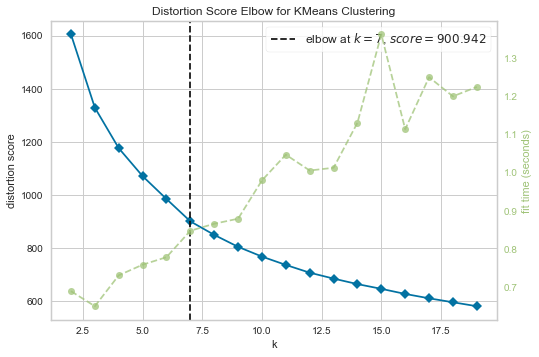

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [12]:
# Optimum number of clusters

kmeans = KMeans()
elbow = KElbowVisualizer(kmeans, k=(2, 20))
elbow.fit(model_df)
elbow.show()

In [13]:
# 3. Modeling

k_means = KMeans(n_clusters = 7, random_state= 42).fit(model_df)
segments=k_means.labels_
segments

array([6, 6, 6, ..., 1, 2, 0])

In [14]:
final_df = df[["master_id","order_num_total_ever_online","order_num_total_ever_offline","customer_value_total_ever_offline","customer_value_total_ever_online","recency","tenure"]]
final_df["segment"] = segments
final_df.head()

<ipython-input-14-66386107fe6b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df["segment"] = segments


,master_id,order_num_total_ever_online,order_num_total_ever_offline,customer_value_total_ever_offline,customer_value_total_ever_online,recency,tenure,segment
0,cc294636-19f0-11eb-8d74-000d3a38a36f,4.00,1.00,139.99,799.38,95.00,119.00,6
1,f431bd5a-ab7b-11e9-a2fc-000d3a38a36f,19.00,2.00,159.97,1853.58,105.00,1469.00,6
2,69b69676-1a40-11ea-941b-000d3a38a36f,3.00,2.00,189.97,395.35,186.00,366.00,6
3,1854e56c-491f-11eb-806e-000d3a38a36f,1.00,1.00,39.99,81.98,135.00,11.00,3
4,d6ea1074-f1f5-11e9-9346-000d3a38a36f,1.00,1.00,49.99,159.99,86.00,582.00,4


In [15]:
# Statistical analysis of each segment

final_df.groupby("segment").agg({"order_num_total_ever_online":["mean","min","max"],
                                  "order_num_total_ever_offline":["mean","min","max"],
                                  "customer_value_total_ever_offline":["mean","min","max"],
                                  "customer_value_total_ever_online":["mean","min","max"],
                                  "recency":["mean","min","max"],
                                  "tenure":["mean","min","max","count"]})


order_num_total_ever_online             order_num_total_ever_offline             customer_value_total_ever_offline                 customer_value_total_ever_online                 recency              tenure                    
                               mean  min    max                         mean  min    max                              mean    min      max                             mean    min      max    mean   min    max   mean   min     max count
segment                                                                                                                                                                                                                                    
0                              1.42 1.00   5.00                         1.28 1.00   5.00                            145.16  10.00   829.98                           210.07  12.99  1519.17  225.71 88.00 367.00 489.85 52.00 2820.00  5448
1                              2.20 1.00  12.00                         2.10 1.00  14.00                            293.82  12.99  3425.14                           377.70  23.99  3444.08   10.00  2.00  27.00 665.01  2.00 3031.00  1841
2                              1.84 1.00  13.00                         3.77 1.00 109.00                            551.78 106.82 18119.14                           283.36  14.99  2587.20  153.29 22.00 366.00 729.95 20.00 2911.00  3269
3                              1.40 1.00   8.00                         1.13 1.00   6.00                            192.39  12.99  1333.00                           250.37  19.99  3476.81  139.55  4.00 367.00  37.24  0.00  132.00   828
4                              1.61 1.00   6.00                         1.48 1.00   6.00                            185.84  12.99  1406.85                           250.00  14.00  1307.33   50.33 15.00 109.00 604.52 43.00 2828.00  3340
5                              8.63 2.00 200.00                         2.10 1.00  36.00                            278.89  12.99  3589.65                          1475.52 265.97 45220.13   32.72  2.00 109.00 966.63 18.00 3034.00  1974
6                              6.37 1.00  55.00                         1.54 1.00  16.00                            184.41  10.49  1644.79                           985.51 180.96 12038.18  180.09 55.00 367.00 943.90 26.00 2964.00  3245

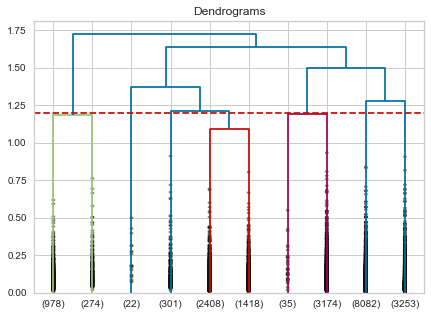

In [16]:
# 3. Customer Segmentation with Hierarchical Clustering

# Determining the optimum number of clusters using the standardized dataframe

hc_complete = linkage(model_df, 'complete')

plt.figure(figsize=(7, 5))
plt.title("Dendrograms")
dend = dendrogram(hc_complete,
           truncate_mode="lastp",
           p=10,
           show_contracted=True,
           leaf_font_size=10)
plt.axhline(y=1.2, color='r', linestyle='--')
plt.show()

In [19]:
# Modeling and segmentation of customers

hc = AgglomerativeClustering(n_clusters=5)
segments = hc.fit_predict(model_df)

final_df = df[["master_id","order_num_total_ever_online","order_num_total_ever_offline","customer_value_total_ever_offline","customer_value_total_ever_online","recency","tenure"]]
final_df["segment"] = segments
final_df.head()

<ipython-input-19-66386107fe6b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df["segment"] = segments


,master_id,order_num_total_ever_online,order_num_total_ever_offline,customer_value_total_ever_offline,customer_value_total_ever_online,recency,tenure,segment
0,cc294636-19f0-11eb-8d74-000d3a38a36f,4.00,1.00,139.99,799.38,95.00,119.00,3
1,f431bd5a-ab7b-11e9-a2fc-000d3a38a36f,19.00,2.00,159.97,1853.58,105.00,1469.00,2
2,69b69676-1a40-11ea-941b-000d3a38a36f,3.00,2.00,189.97,395.35,186.00,366.00,0
3,1854e56c-491f-11eb-806e-000d3a38a36f,1.00,1.00,39.99,81.98,135.00,11.00,3
4,d6ea1074-f1f5-11e9-9346-000d3a38a36f,1.00,1.00,49.99,159.99,86.00,582.00,0


In [20]:
# Statistical analysis of each segment

final_df.groupby("segment").agg({"order_num_total_ever_online":["mean","min","max"],
                                  "order_num_total_ever_offline":["mean","min","max"],
                                  "customer_value_total_ever_offline":["mean","min","max"],
                                  "customer_value_total_ever_online":["mean","min","max"],
                                  "recency":["mean","min","max"],
                                  "tenure":["mean","min","max","count"]})

order_num_total_ever_online             order_num_total_ever_offline             customer_value_total_ever_offline                customer_value_total_ever_online                 recency              tenure                     
                               mean  min    max                         mean  min    max                              mean   min      max                             mean    min      max    mean   min    max   mean    min     max count
segment                                                                                                                                                                                                                                    
0                              1.37 1.00  13.00                         1.99 1.00 109.00                            261.97 10.49 18119.14                           208.07  12.99 30688.47  183.03 18.00 367.00 569.72   3.00 2911.00  8747
1                              3.75 1.00  49.00                         1.82 1.00  24.00                            240.98 12.99  3425.14                           638.61  19.99 12545.37   23.96  2.00 108.00 715.07  18.00 3034.00  4994
2                              6.91 1.00 200.00                         3.08 1.00  16.00                            427.12 12.99  2963.24                          1104.12 139.98 45220.13  131.57 14.00 365.00 914.49 109.00 3016.00  2396
3                              1.40 1.00   6.00                         1.20 1.00   6.00                            200.69 12.99  1019.97                           227.42  26.99  1389.60   92.52  4.00 367.00  80.26   0.00  555.00   985
4                              4.74 1.00  24.00                         1.12 1.00   4.00                            123.46 10.00  1049.92                           722.77  59.98  7665.28  196.52 36.00 367.00 876.95  71.00 2964.00  2823